In [4]:
import pandas as pd
import seaborn as sns

# Data Prep

In [6]:
athletes = pd.read_csv("athlete_events.csv")

In [7]:
athletes.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
def team_summary(data):
    return pd.Series({
        'team': data.iloc[0,:]["NOC"],
        'country': data.iloc[-1,:]["Team"],
        'year': data.iloc[0,:]["Year"],
        'events': len(data['Event'].unique()),
        'athletes': data.shape[0],
        'age': data["Age"].mean(),
        'height': data['Height'].mean(),
        'weight': data['Weight'].mean(),
        'sport':  data.iloc[-1,:]["Sport"],
        'medals': sum(~pd.isnull(data["Medal"]))
    })

teams = athletes.groupby(["NOC", "Year", "Sport"]).apply(team_summary)

C:\Users\Priya\AppData\Local\Temp\ipykernel_11148\4142119785.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  teams = athletes.groupby(["NOC", "Year", "Sport"]).apply(team_summary)


In [9]:
teams.sample(5)

,,,team,country,year,events,athletes,age,height,weight,sport,medals
NOC,Year,Sport,,,,,,,,,,
HUN,1956,Diving,HUN,Hungary,1956,2,4,20.500000,NaN,NaN,Diving,0
POL,2000,Modern Pentathlon,POL,Poland,2000,2,3,26.666667,174.333333,62.333333,Modern Pentathlon,0
BAR,1992,Sailing,BAR,Barbados,1992,3,5,37.600000,NaN,NaN,Sailing,0
EST,1996,Shooting,EST,Estonia,1996,2,2,33.000000,182.500000,101.500000,Shooting,0
BER,1996,Equestrianism,BER,Bermuda,1996,1,1,40.000000,NaN,NaN,Equestrianism,0


In [10]:
teams = teams.reset_index(drop=True)
teams = teams.dropna()

In [11]:
def prev_medals(data):
    data = data.sort_values("year", ascending=True)
    data["prev_medals"] = data["medals"].shift(1)
    data["prev_3_medals"] = data["medals"].astype(float).rolling(3, closed="left", min_periods=1).mean()
    data["prev_5_medals"] = data["medals"].astype(float).rolling(5, min_periods=1).mean()
    data["medals_per_athlete"] = data["prev_medals"] / data["athletes"]
    data["athletes_per_event"] = data["athletes"] / data["events"]
    data["prev_medalist_ratio"] = data["prev_medals"] / data["athletes"]
    return data

teams = teams.groupby(["team","sport"]).apply(prev_medals)
teams = teams.reset_index(drop=True)
teams = teams[teams["year"] > 1960]
teams = teams.round(1)

C:\Users\Priya\AppData\Local\Temp\ipykernel_11148\850196953.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  teams = teams.groupby(["team","sport"]).apply(prev_medals)


In [12]:
teams.sample(5)

,team,country,year,events,athletes,age,height,weight,sport,medals,prev_medals,prev_3_medals,prev_5_medals,medals_per_athlete,athletes_per_event,prev_medalist_ratio
11172,ITA,Italy,2010,3,12,21.2,169.2,61.2,Nordic Combined,1,0.0,0.0,0.2,0.0,4.0,0.0
11448,JAM,Jamaica,1984,3,3,18.3,180.0,72.7,Boxing,0,0.0,0.0,0.0,0.0,1.0,0.0
3006,BUL,Bulgaria,1996,1,1,27.0,168.0,68.0,Judo,0,0.0,0.7,0.4,0.0,1.0,0.0
8624,GER,Germany,2012,9,23,27.2,181.6,73.7,Fencing,5,2.0,5.7,5.0,0.1,2.6,0.1
175,AND,Andorra,1988,6,9,17.1,173.0,71.0,Alpine Skiing,0,0.0,0.0,0.0,0.0,1.5,0.0


In [13]:
teams.corr(numeric_only=True)["medals"]

year                  -0.036260
events                 0.344345
athletes               0.545793
age                   -0.006271
height                 0.110346
weight                 0.069000
medals                 1.000000
prev_medals            0.740121
prev_3_medals          0.757896
prev_5_medals          0.874770
medals_per_athlete     0.286986
athletes_per_event     0.304080
prev_medalist_ratio    0.286986
Name: medals, dtype: float64

In [14]:
teams = teams.dropna()
teams.shape

(17269, 16)

In [15]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

reg = LinearRegression()

In [17]:
predictors = ["athletes", "prev_medals",  "prev_3_medals", "prev_5_medals" ]

In [18]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [19]:
predictions = reg.predict(test[predictors])

In [20]:
predictions.shape

(3632,)

In [21]:
test["predictions"] = predictions

In [22]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [23]:
test["predictions"] = test["predictions"].round()

In [24]:
error = mean_absolute_error(test["medals"], test["predictions"])
error

0.5322136563876652

In [25]:
teams.describe()["medals"]

count    17269.000000
mean         1.490474
std          4.508528
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         83.000000
Name: medals, dtype: float64

In [26]:
test["predictions"] = predictions

In [27]:
test[(test["team"] == "USA") & (test["year"] == 2016)][["team","sport","medals","predictions" ]].head(5)

,team,sport,medals,predictions
21117,USA,Archery,4,4.509107
21147,USA,Athletics,46,41.246608
21154,USA,Badminton,0,-0.016677
21176,USA,Basketball,24,24.972549
21182,USA,Beach Volleyball,2,2.181779


In [28]:
errors = (test["medals"] - predictions).abs()

In [29]:
error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = test["medals"].groupby(test["team"]).mean()
error_ratio =  error_by_team / medals_by_team 

In [30]:
error_ratio

team
AFG    0.345612
ALB         inf
ALG    1.433008
AND         inf
ANG         inf
         ...   
VIE    1.049130
VIN         inf
YEM         inf
ZAM         inf
ZIM         inf
Name: medals, Length: 204, dtype: float64

In [31]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

<Axes: ylabel='Frequency'>

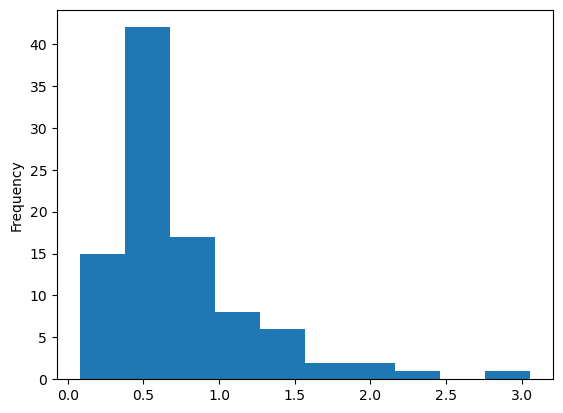

In [32]:
error_ratio.plot.hist()

In [33]:
error_ratio.sort_values()

team
JAM    0.077763
IOA    0.096412
KEN    0.126131
ETH    0.146952
SRB    0.162283
         ...   
MAR    1.828834
GRE    1.873253
GUA    1.962742
HKG    2.257704
BUL    3.057620
Name: medals, Length: 94, dtype: float64